# Sinals and Systems Project III

**Unit 3, Fourier <br />
Rafael Figueredo Guimarães**

Esse projeto tem como objetivo trabalhar visualmente os conceitos base das séries e transformadas de Fourier

### O som das harmônicas - Instrumentos aproximados com a série Fourier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import timeit
import warnings
import statsmodels.api as sm
import IPython
import wave
import requests
from audioop import mul
from scipy import integrate
from scipy.io import wavfile
from audioop import add
from io import BytesIO
from IPython.display import Audio, display, HTML
%matplotlib inline
warnings.filterwarnings('ignore')

A série de Fourier é descrita da seguinte forma:

Seja $x(t)$ uma função periódica com o período $T$, isto é,

$$ x(t) = x(t+nT), n ∈ Z.$$

Podemos escrever $x(t)$ como uma série de Fourier do seguinte modo;

$$ x(t)= \frac{a_{0}}{2}+\sum_{n=1}^{\infty} a_{n}\cos{\left(2\pi \frac{nt}{T} \right)} + b_{n} \sin{\left( 2\pi \frac{nt}{T}\right)} $$

# Reproduzindo e Analisando [[1]](https://dspillustrations.com/pages/posts/misc/fourier-series-and-harmonic-approximation.html)

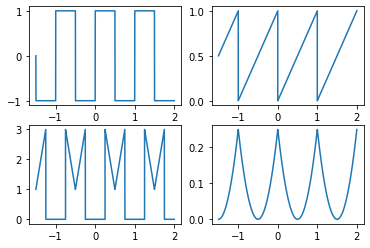

In [3]:
Fs = 10000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
func2 = lambda t: t % 1
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
func4 = lambda t: ((t%1)-0.5)**2
t = np.arange(-1.5, 2, 1/Fs)
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))

In [4]:
def fourierSeries(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)


A função 
~~~python
def fourierSeries(period, N):
~~~
executa o cálculo dos coeficientes 
da série Fourier. 

Esses coeficientes $a_{n}$ e $b_{n}$ são armazenados em array, em pares 

A seguir será plotado os gráficos do resultado. 

<StemContainer object of 3 artists>

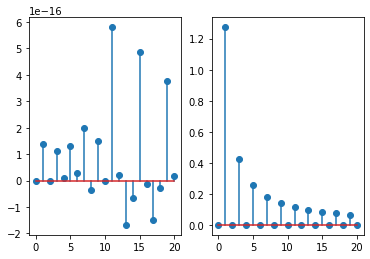

In [5]:
t_period = np.arange(0, 1, 1/Fs)
F = fourierSeries(func1(t_period), 20)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])

In [6]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

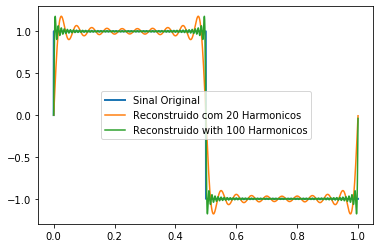

In [7]:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Sinal Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstruido com 20 Harmonicos');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstruido with 100 Harmonicos');
plt.legend(loc='best')

Como podemos ver o sinal reconstruido é muito parecido com o sinal original e quanto maior a quantidade de Harmonicos mais próximo será o sinal reconstruído do original.

In [8]:
def showHarmonics(period, N):
    # Calculate the Fourier Series up to N harmonics, and show the reconstructed signal
    F = fourierSeries(period, N+1)
    plt.subplot(231); plt.stem(F[:,0])
    plt.subplot(234); plt.stem(F[:,1])
    plt.subplot(132)
    T = len(period)
    t = np.arange(T)/T
    result = 0
    for n, (an, bn) in enumerate(F):
        if n == 0:
            an = an/2
        cos_part = an*np.cos(2*np.pi*n*t)
        sin_part = bn*np.sin(2*np.pi*n*t)
        plt.plot(t, cos_part)
        plt.plot(t, sin_part)
        result = result + cos_part + sin_part
    plt.subplot(133)
    t2 = np.arange(2*T)/T
    plt.plot(t2, np.tile(period, 2))
    plt.plot(t2, np.tile(result, 2))

# TAREFA 1: 

Reproduzir e explicar os resultados do artigo do link [[2]](https://dspillustrations.com/pages/posts/misc/the-sound-of-harmonics-approximating-instrument-sounds-with-fourier-series.html), considerando ao menos três amostras de som disponíveis no site. [[3]](https://bit.ly/33qICZZ)

In [9]:
def loadSound(url):
    R = requests.get(url)
    rate, data = wavfile.read(BytesIO(R.content))
    data = data * 1.0 / (abs(data).max())
    if len(data.shape) > 1:  # for stereo data, use only first channel
        data = data[:,0]
    return data, rate

# the URLs of the wav files
urls = [
        "https://raw.githubusercontent.com/rafaelfigueredog/SignalsAndSystems/master/waves/077_mello-rock-organ.wav", 
        "https://raw.githubusercontent.com/rafaelfigueredog/SignalsAndSystems/master/waves/070_dark-history-kicks.wav",
        "https://raw.githubusercontent.com/rafaelfigueredog/SignalsAndSystems/master/waves/piano.wav"
       ]
sounds = []
for url in urls:
    sound, rate = loadSound(url)
    sounds.append((sound, rate))

In [10]:
# Utility function two display two audios side by side in the notebook
def audioSideBySide(name1, audio1, name2, audio2):
    text = '%s	%s %s	%s' % (name1, name2, audio1._repr_html_(), audio2._repr_html_())
    display(HTML(text))

In [111]:
for n, s in enumerate(sounds):
    display(HTML("Sound %d" % (n+1) + Audio(data=s[0], rate=s[1])._repr_html_()))

Nesse primeiro audio vamos plotar o gráfico do sinal completo, em seguida vamos expadir o gráfico para vizualizar gráficamente onde o sinal se repete, captando manualmente o periodo do sinal. Esse processo será repetido nos próximos dois audios. 

**1º Audio** Perido identificado: 0.175 - 0.187

(0.175, 0.187)

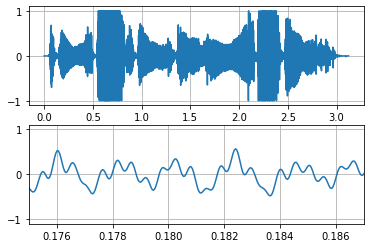

In [103]:
t = np.arange(len(sounds[0][0])) / sounds[0][1]

plt.subplot(211)
plt.grid('True')
plt.plot(t, sounds[0][0])

plt.subplot(212)
plt.plot(t, sounds[0][0])
plt.grid('True')
plt.xlim(0.175, 0.187)

**2º Audio** Perido identificado: 0.100 - 0.300

(0.1, 0.3)

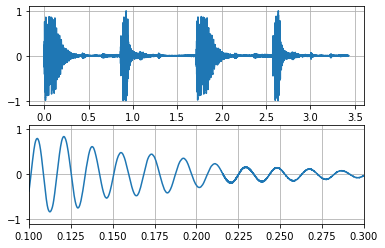

In [100]:
t = np.arange(len(sounds[1][0])) / sounds[1][1]
plt.subplot(211)
plt.grid('True')
plt.plot(t, sounds[1][0])
plt.subplot(212)
plt.plot(t, sounds[1][0])
plt.grid('True')
plt.xlim(0.100, 0.300)

**3º Audio** Perido identificado: 0.125 - 0.150

(0.1, 0.3)

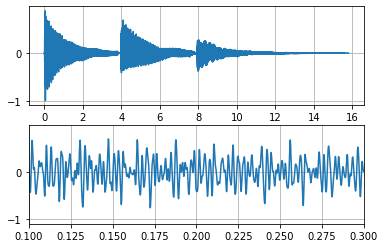

In [109]:
t = np.arange(len(sounds[2][0])) / sounds[2][1]
plt.subplot(211)
plt.grid('True')
plt.plot(t, sounds[2][0])
plt.subplot(212)
plt.plot(t, sounds[2][0])
plt.grid('True')
plt.xlim(0.100, 0.300)

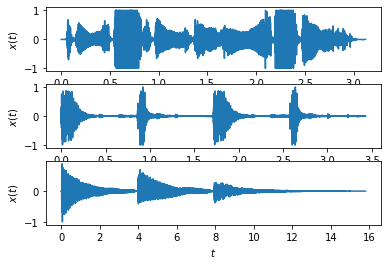

In [110]:
def extractPeriod(data, rate, t_start, t_end):
    t = np.arange(0,len(data))/rate
    plt.plot(t, data)

    duration = t_end - t_start
    plt.xlabel('$t$'); plt.ylabel('$x(t)$');


    sample_start = int(t_start * rate)
    sample_end = int(t_end*rate)

    period = data[sample_start:sample_end]
    audioSideBySide("Original", Audio(data=data,rate=rate), 
                    "Extracted period", Audio(np.tile(period, int(1/duration)), rate=rate))
    return period, rate


periods = []
rates = []

# Os periodos serão inseridos dentro da lista periodBounds.

periodBounds = [(0.175, 0.187),
                (0.100, 0.300),
                (0.100, 0.300)]



for n, (S, P) in enumerate(zip(sounds, periodBounds)):
    plt.subplot(len(sounds), 1, n+1)
    period, rate = extractPeriod(S[0], S[1], P[0], P[1])
    periods.append(period); rates.append(rate)

# Observação 2

In [14]:
def approximateUpToNthHarmonic(period, rate, N):
    t = np.arange(len(period)) / rate
    duration = t.max()
    F = fourierSeries(period, N)
    powers = np.sqrt(np.sum(F**2, axis=1))
    reconstructed = reconstruct(len(period), F)
    
    audioSideBySide("Original", Audio(data=np.tile(period, int(0.7/duration)), rate=rate), 
                    "Reconstruido com %d harmonics" % N, Audio(data=np.tile(reconstructed, int(0.7/duration)), rate=rate))

In [15]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 1)

Como podemos ver, estamos utilizando a quantidade de 1 Harmonicos, agora vamos aumentar para 100 harmonicos e analisar o resultado. 

In [16]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 100)

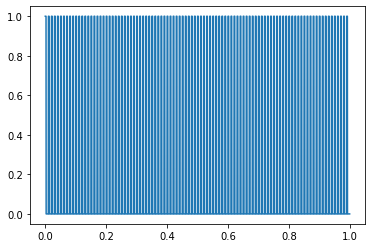

In [17]:
Fs = 10000
F = 100
N = Fs/F
T=1
period = (np.arange(N) < (N/4)).astype(float)
t = np.arange(0, T, 1/Fs)
signal = np.tile(period, T*F)
plt.plot(t, signal)
Audio(data=signal, rate=Fs)

In [18]:
for N in [1, 3, 5, 11, 21, 49]:
    approximateUpToNthHarmonic(period, Fs, N)

Nesse caso podemos observar que a medida que o N aumenta em cada interação o sinal recontruído se aproximando do original

# PARTE 2

Reproduzir os resultados dos 16 exemplos mostrados no texto em anexo, discutindo se o resultado computacional equivale ao analítico mostrado no exemplo.

In [19]:
def ft(samples, Fs, t0):
    """Aproximar a transformada de Fourier de um sinal de tempo 
    limitado por meio da transformada de Fourier discreta.
    
    samples: Valores de sinal amostrados nas posições t0 + n/Fs
    Fs: Frequência de amostragem do sinal
    t0: tempo de início da amostragem do sinal
    """
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return np.fft.fftshift(np.fft.fft(samples)/Fs * np.exp(-2j*np.pi*f*t0))

# Exemplo 1

$$x(t) = e^{-at}*u(t) $$

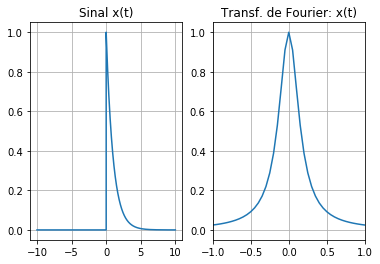

In [20]:
Fs = 10000  
t0 = 10     
t = np.arange(-t0, t0, 1/Fs)  
f = np.arange(-Fs/2, Fs/2, Fs/len(t))

u = lambda t: (t>=0).astype(int) # Definição do sinal u(t)
x = lambda t: np.exp(-t)*u(t) # a = 1 

plt.subplot(121)
plt.plot(t, x(t))
plt.title("Sinal x(t)")
plt.grid(True)

plt.subplot(122)
plt.plot(f, ft(x(t), Fs, -t0).real)
plt.title('Transf. de Fourier: x(t)')
plt.xlim(-1, 1)
plt.grid(True)

# Exemplo 2

$$ x(t) = e^{-a|t|}*u(t) $$

(-1.5, 1.5)

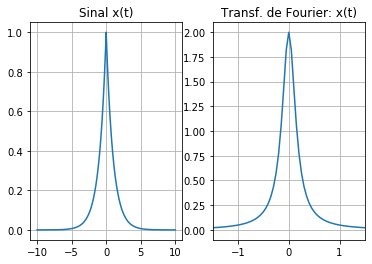

In [21]:
x = lambda t: np.exp(-np.absolute(t)) # a = 1 
plt.subplot(121)
plt.plot(t, x(t))
plt.title("Sinal x(t)")
plt.grid(True)

plt.subplot(122)
plt.plot(f, ft(x(t), Fs, -t0).real)
plt.title('Transf. de Fourier: x(t)')
plt.grid(True)
plt.xlim(-1.5, 1.5)

# Exemplo 3
$$
x(t) = 
  \begin{cases}
      1, & |t| < a \\
      0, & |t| > a
  \end{cases}
$$

(-5, 5)

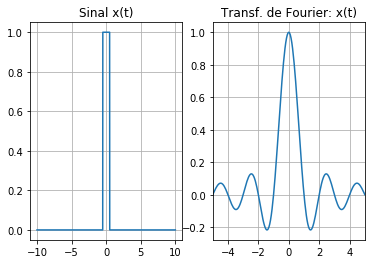

In [27]:
def rect(t):
    return (abs(t) <= 0.5).astype(float)

x = rect
plt.subplot(121)
plt.plot(t, x(t))
plt.title("Sinal x(t)")
plt.grid(True)

plt.subplot(122)
plt.plot(f, ft(x(t), Fs, -t0).real)
plt.title('Transf. de Fourier: x(t)')
plt.grid(True)
plt.xlim(-5,5)

# Exemplo 4
$$
    x(t) = \sin(\omega t)
$$

(-3.141592653589793, 3.141592653589793)

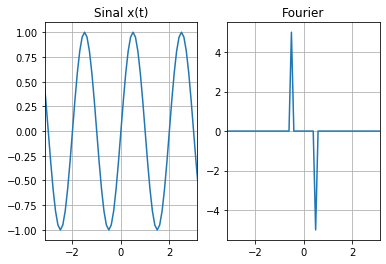

In [28]:
Fs = 10 
t0 = 5     
t = np.arange(-t0, t0, 1/Fs)  
f = np.arange(-Fs/2, Fs/2, Fs/len(t))  
x = lambda t: np.sin(np.pi*t)


plt.subplot(121)
plt.plot(t, x(t))
plt.grid('True')
plt.title("Sinal x(t)")
plt.xlim(-np.pi, np.pi)


plt.subplot(122)
plt.grid('True')
plt.title("Fourier")
plt.plot(f, ft(x(t), Fs, t0).imag)
plt.xlim(-np.pi, np.pi)

# Exemplo 5
$$
    x(t) = \cos(\omega t)
$$

(-3.141592653589793, 3.141592653589793)

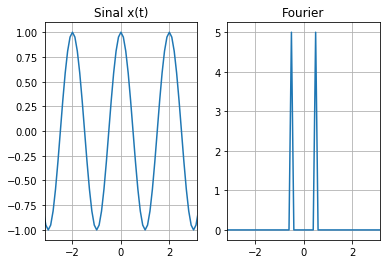

In [29]:
x = lambda t: np.cos(np.pi*t)


plt.subplot(121)
plt.plot(t, x(t))
plt.grid('True')
plt.title("Sinal x(t)")
plt.xlim(-np.pi, np.pi)

plt.subplot(122)
plt.grid('True')
plt.title("Fourier")
plt.plot(f, ft(x(t), Fs, t0).real)
plt.xlim(-np.pi, np.pi)

# Exemplo 6
$$
    x(t) = 
    \begin{cases}
      -1, & -1 < t < 0 \\
       1, &  0 < t < 1
     \end{cases}
$$

(-5, 5)

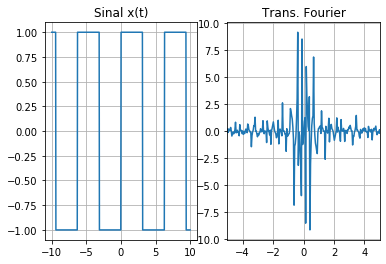

In [30]:
t = np.linspace(-10, 10, 500)
x = ss.square(t, duty= 0.5)
x = [-1 if i <= 0 else 1 for i in x]


plt.subplot(121)
plt.plot(t, x)
plt.grid('True')
plt.title("Sinal x(t)")


plt.subplot(122)
plt.grid('True')
plt.title("Trans. Fourier")
plt.plot(t, ft(x, Fs, t0).imag)
plt.xlim(-5,5)

# Exemplo 7
$$
    x(t) = 
    \begin{cases}
      -1, &   |t| < a \\
       0, &   a < |t| < \frac{T}{2}
     \end{cases}
$$

(-5, 5)

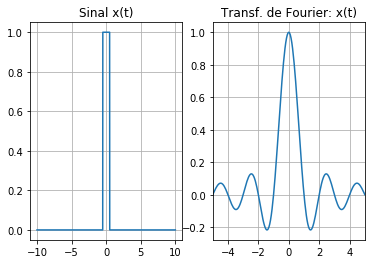

In [32]:
Fs = 10000  
t0 = 10     
t = np.arange(-t0, t0, 1/Fs)  
f = np.arange(-Fs/2, Fs/2, Fs/len(t))

def rect(t):
    return (abs(t) <= 0.5).astype(float)

x = rect
plt.subplot(121)
plt.plot(t, x(t))
plt.title('Sinal x(t)')
plt.grid('True')
plt.subplot(122)
plt.plot(f, ft(x(t), Fs, -t0).real)
plt.title('Transf. de Fourier: x(t)')
plt.grid('True')
plt.xlim(-5,5)

# Exemplo 8

$$ x(t) = x_1(t − 2, 5) + x_2(t − 2, 5)$$

Neste exemplo será utilizado o conceito de _time shift_ e de _transladação_ conforme mostrado no exemplo proposto.

In [ ]:
x = lambda t: np.heaviside(t-1, 1) + (0.5*np.heaviside(t-2, 1) - 0.5*np.heaviside(t-3, 1)) - np.heaviside(t-4, 1)


plt.subplot(121)
plt.grid(True)
plt.title("Sinal x(t)")
plt.plot(t, x(t))

plt.subplot(122)
plt.grid(True)
plt.title("Trans. de Fourier x(t)")
plt.plot(f, ft(x(t), Fs, t0).real)

# Exemplo 9

$$x(t) = e^{− at}, a > 0 $$

(-5, 5)

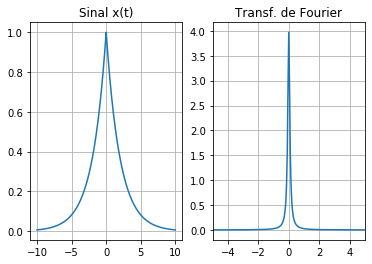

In [33]:
a = 0.5
x = lambda t: np.exp(-a*np.abs(t)) * (a > 0)

plt.subplot(121)
plt.title("Sinal x(t)")
plt.plot(t, x(t))
plt.grid(True)

plt.subplot(122)
plt.title("Transf. de Fourier")
plt.plot(f, ft(x(t), Fs, t0).real)
plt.grid(True)
plt.xlim(-5,5)

# Exemplo 10

A transformada de Fourier do impulso unitário $u_o(t):$

$$ y(t) = \int_{\infty}^{t}{x(t)dt} $$

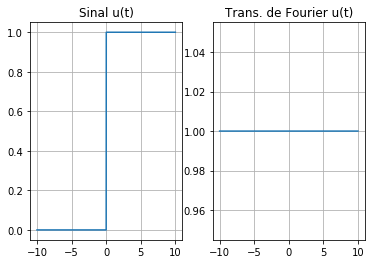

In [40]:
w = 0
j = 0
u = lambda t: (t>=0).astype(int)
Tu = lambda t: np.exp(-j*w*t)

plt.subplot(121)
plt.title("Sinal u(t)")
plt.plot(t, u(t))
plt.grid(True)


plt.subplot(122)
plt.grid(True)
plt.title("Trans. de Fourier u(t)")
plt.plot(t, Tu(t))

# Exemplo 12

$$ x(t) = e^{-|t|}$$

(-5, 5)

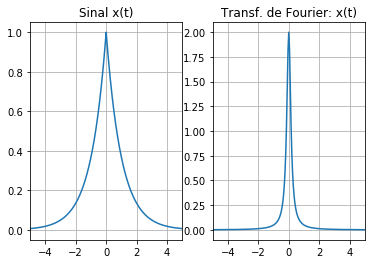

In [49]:
x = lambda t: np.exp(-np.abs(t))

plt.subplot(121)
plt.grid(True)
plt.title("Sinal x(t)")
plt.plot(t, x(t))
plt.xlim(-5,5)

plt.subplot(122)
plt.grid(True)
plt.title("Transf. de Fourier: x(t)")
plt.plot(f, ft(x(t), Fs, t0).real)
plt.xlim(-5,5)

# Exemplo 13:

$$h(t) = u_o (t − t_o)$$

Fazendo um adiantamento do sinal temos:

(-5, 5)

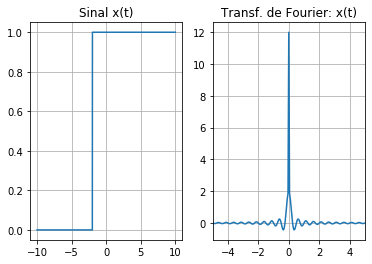

In [48]:
x = lambda t: np.heaviside((t+2),1) 

plt.subplot(121)
plt.grid(True)
plt.title("Sinal x(t)")
plt.plot(t, x(t))

plt.subplot(122)
plt.grid(True)
plt.title("Transf. de Fourier: x(t)")
plt.plot(f, ft(x(t), Fs, t0).real)
plt.xlim(-5,5)

# Exemplo 14:

O exemplo 14 não possui dados gráficos, mostra uma demonstração do modelo de sistemas chamados "diferenciadores" onde para um sinal x(t) a saída y(t) é a sua derivada. 

$$y(t) = \frac{dx}{dt}(t)$$


# Exemplo 15:

O exemplo 15 tmabém não possui dados gráficos, mostra uma demonstração do modelo de sistemas chamados "integradores" onde para um sinal x(t) a saída y(t) é a sua integral

$$y(t) = \int_{-\infty}^{t}x(\tau)d\tau $$

# Exemplo 8.16

(-5, 5)

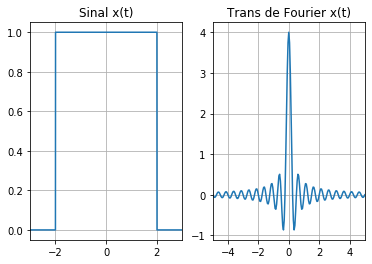

In [53]:
wc = 2
x = lambda t: 1*(np.abs(t) < wc)


plt.subplot(121)
plt.grid(True)
plt.title("Sinal x(t)")
plt.plot(t, x(t))
plt.xlim(-3,3)


plt.subplot(122)
plt.grid(True)
plt.title("Trans de Fourier x(t)")
plt.plot(f, ft(x(t), Fs, t0).real)
plt.xlim(-5,5)